# MAPS
**MAPS** (**M**achine learning for **A**nalysis of **P**roteomics in **S**patial biology) is a Python package and includes a cell_phenotyping module, which is specifically designed for pathologist-level cell phenotyping from multiplex images of histology tissue through machine learning.

## Cell Phenotyping
The cell_phenotyping module in MAPS provides a machine learning pipeline to train a robust cell classification model on a given dataset and to use a pretrained model to make prediction on new data. 

### Model Input
To use cell_phenotyping module, the dataset should be prepared in a CSV format with at least N+1 columns, where N is the number of markers in the given dataset, and the additional column is for cell size. Each row of the CSV file should represent marker expressions for a particular cell along with its size.

To train a new cell phenotyping model, the dataset needs to be split into train and validation CSV files. Both of these files should have an additional column called 'cell_label', which provides the ground truth (class ID) for each cell.


In [1]:
train_data_path = '../data/cell_phenotyping/train.csv'
valid_data_path = '../data/cell_phenotyping/valid.csv'

### Model Training

The cell_phenotyping module includes a Trainer class, which is designed to handle the model training process. This class comes with various configurable attributes that can be set when instantiating the class, such as the number of classes, number of features, learning rate, batch size, and the number of epochs to train the model. The **fit** method is used to train the model using the training and validation datasets and saves the best model based on the lowest validation loss. 

In [2]:
from maps.cell_phenotyping import Trainer
model = Trainer(results_dir='../results/cell_phenotyping/', num_features=50, num_classes=16, batch_size=128, max_epochs=500, min_epochs=250, patience=100, verbose=0)
model.fit(train_data_path, valid_data_path)

/home/shaban/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /opt/conda/conda-bld/pytorch_1670525551200/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Train Epoch: 0, train_loss: 1.7588, train_acc: 0.4030, train_auc: 0.8756                 
Valid Epoch: 0, valid_loss: 1.3665, valid_acc: 0.5364, valid_auc: 0.9494                 
--------------------Saving best model--------------------
Time to process epoch(0): 0.2019 minutes                             
Train Epoch: 1, train_loss: 0.9472, train_acc: 0.6943, train_auc: 0.9623                 
Valid Epoch: 1, valid_loss: 0.9617, valid_acc: 0.6768, valid_auc: 0.9771                 
--------------------Saving best model--------------------
Time to process epoch(1): 0.1920 minutes                             
Train Epoch: 2, train_loss: 0.6858, train_acc: 0.7745, train_auc: 0.9792                 
Valid Epoch: 2, valid_loss: 0.7435, valid_acc: 0.7443, valid_auc: 0.9847                 
--------------------Saving best model--------------------
Time to process epoch(2): 0.1900 minutes                             
Train Epoch: 3, train_loss: 0.5952, train_acc: 0.8020, train_auc: 0.9840    

### Model Output
During the training of a new model, the progress is monitored and saved in a CSV file which is stored in a pre-defined results directory. This file contains information about the training progress, such as the loss and accuracy values. Furthermore, the best checkpoint is saved based on the lowest validation loss during the training.

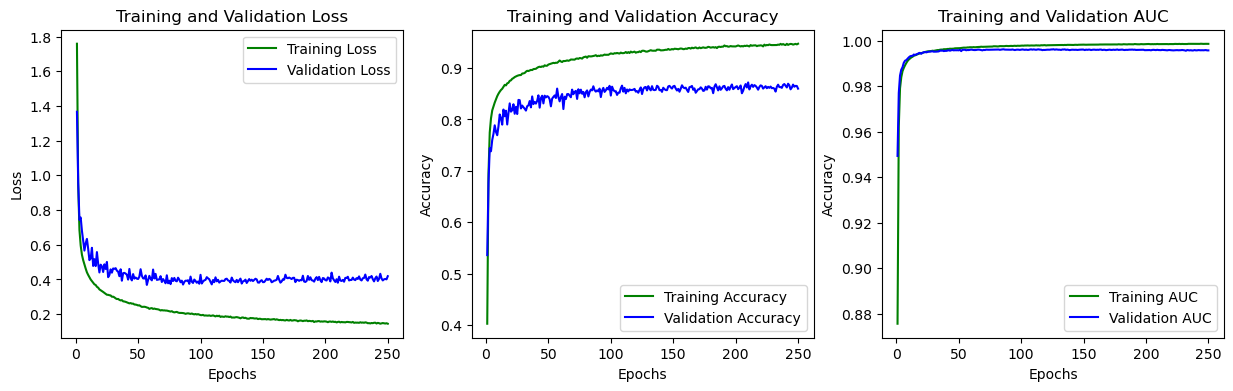

In [3]:
import utils
utils.visulize_training_logs('../results/cell_phenotyping/training_logs.csv')

### Model Evaluation 

To evaluate the performance of the trained model, the **predict** function is used. This function takes as input a dataset in CSV format, and returns the predicted cell labels along with the probabilities for each class. The output can be further analyzed using various evaluation metrics, such as confusion matrix, precision, recall, F1-score, mean average precision, and precision-recall curve, to determine the performance of the model at the class level. These metrics can help in identifying any potential issues with the model, such as overfitting, and can guide the tuning of hyperparameters for better performance.

In [4]:
pred_labels, pred_probs = model.predict(valid_data_path)

Batch 225/225            

#### Model Evaluation Prerequisite

In [5]:
import pandas as pd
import utils

# define class names and color palette for visual results 
class_names = ['B', 'CD4 T', 'CD8 T', 'DC', 'Endothelial', 'Epithelial', 'Lymphatic', 'M1', 'M2', 'Mast', 'Monocyte', 'NK', 'Neutrophil', 'Other', 'Treg', 'Tumor']
color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']

# extracting ground truth cell labels for evaluating model performance against ground truth
gt_labels = pd.read_csv(valid_data_path)['cell_label'].to_numpy()

#### Confusion Matrix
The confusion matrix provides an overview of the number of correctly and incorrectly classified instances for each class.

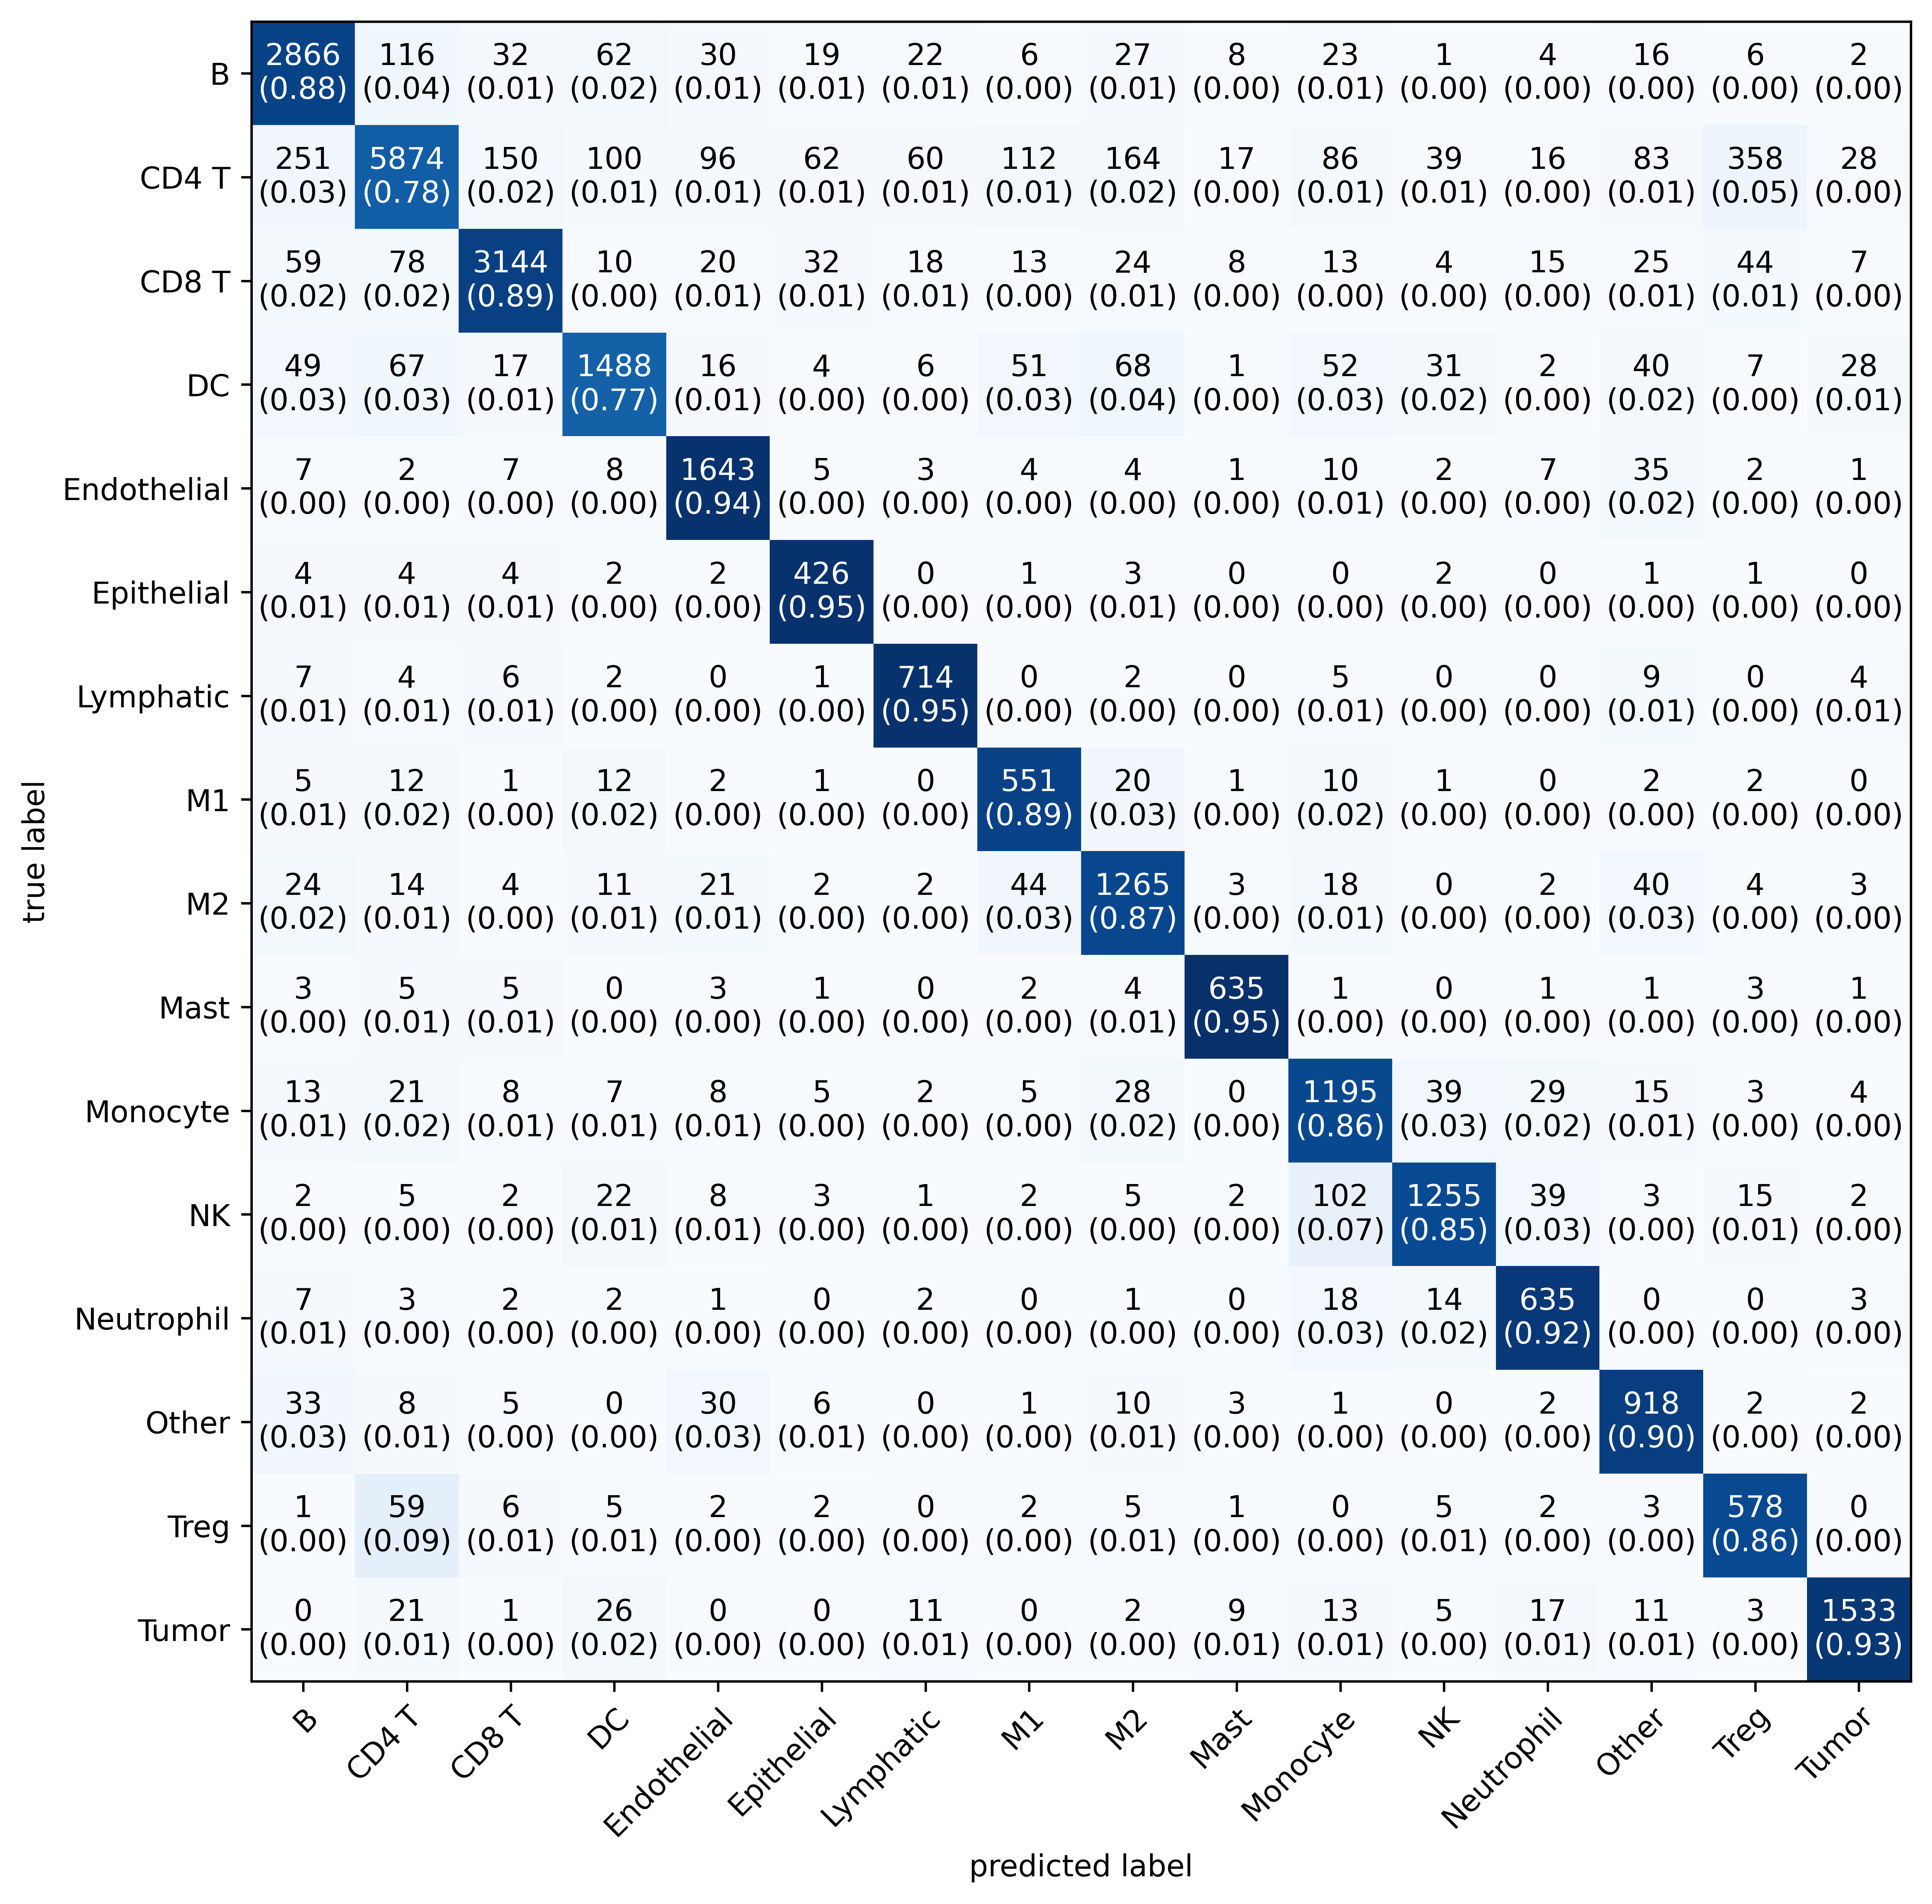

In [6]:
utils.conf_matrix(gt_labels, pred_labels, class_names[:])

#### Precision, Recall, and F1-score
Precision measures the proportion of true positives among the predicted positives, while recall measures the proportion of true positives among the actual positives. F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

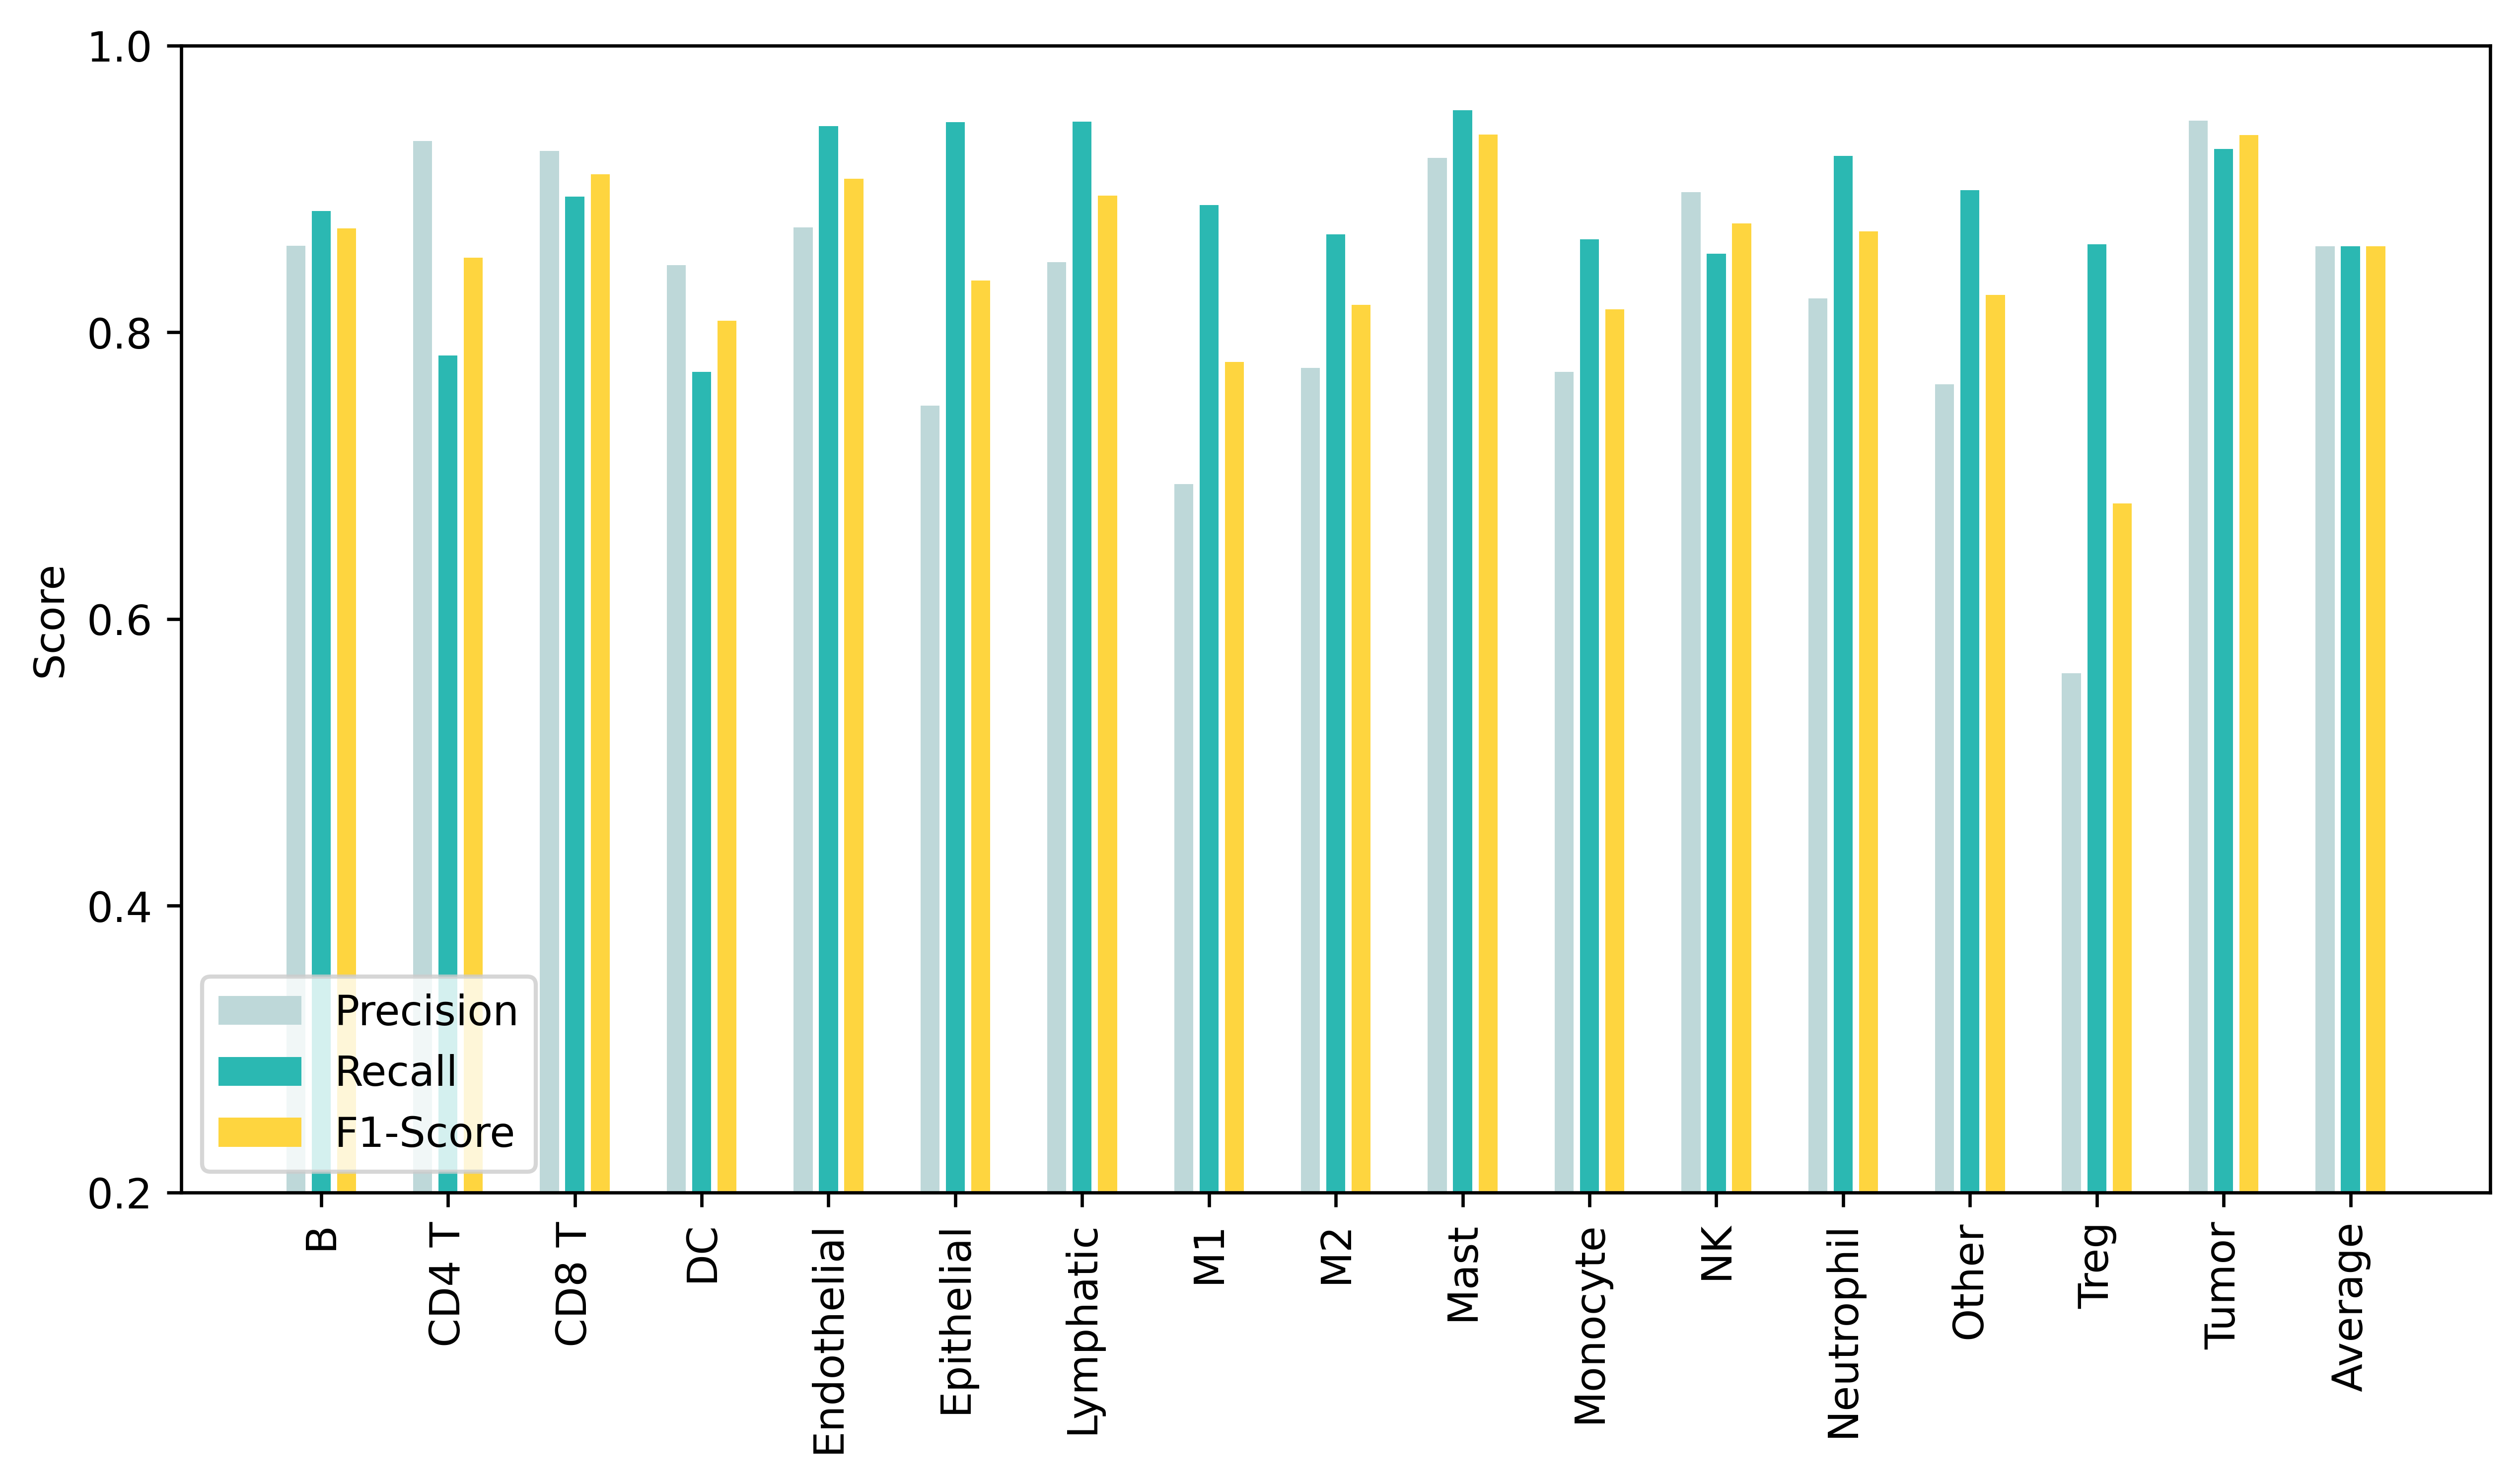

In [7]:
utils.pre_recall_f1_score(gt_labels, pred_labels, class_names[:], color_palette)

#### Mean average precision (mAP) and Precision Recall Curves
Mean average precision (mAP) computes the average precision across all classes, while the precision-recall curve plots the precision-recall trade-off for different classification thresholds.

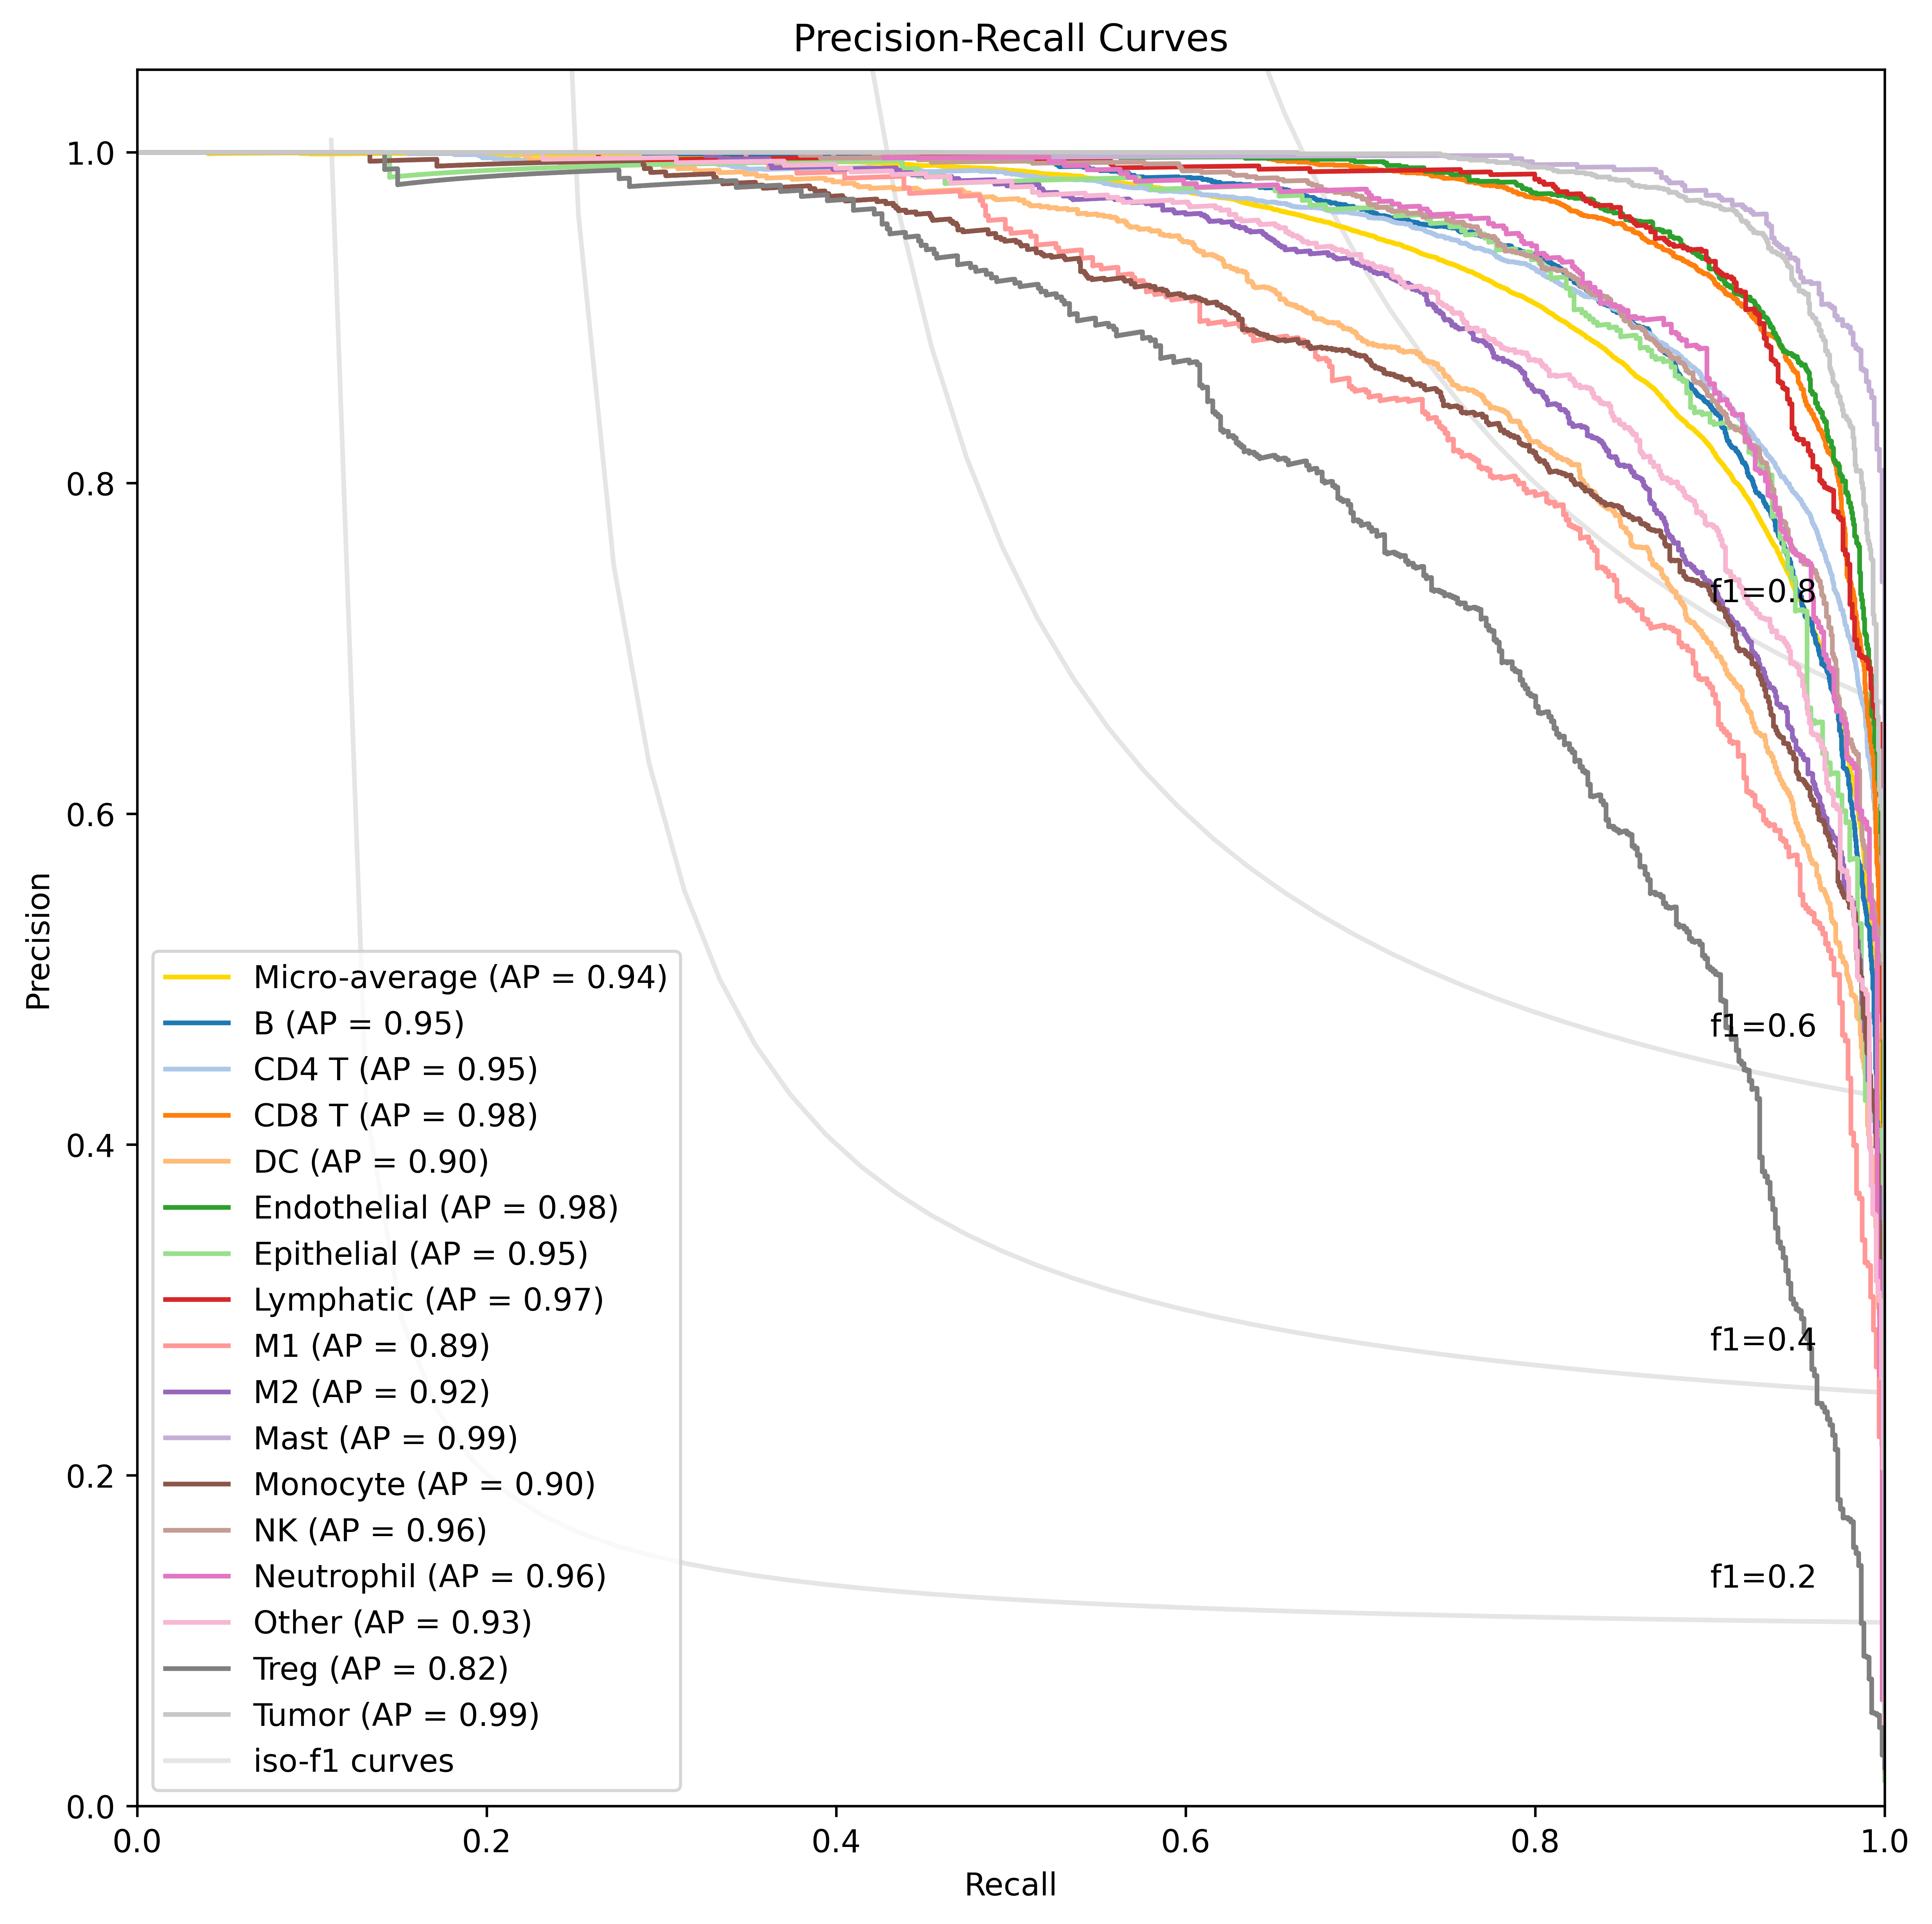

In [8]:
utils.average_pr_curve_per_class(gt_labels, pred_labels, pred_probs, class_names)

### Model Inference
The cell_phenotyping module comes with a Predictor class as well that allows for model inference on new datasets lacking a ground truth label column 'cell_label' in the CSV file. The Predictor class requires the path to the pretrained model as input along with number of classes and features in da. It has a predict function that takes a dataset as input and returns predicted labels and probabilities for all classes for each cell in the dataset. This provides a convenient way to leverage the trained model to make predictions on new data without the need for manual cell labeling.

In [9]:
from maps.cell_phenotyping import Predictor

pretrained_model_checkpoint_path = '../models/cell_phenotyping/cHL_CODEX.pt'
model = Predictor(model_checkpoint_path=pretrained_model_checkpoint_path, num_features=50, num_classes=16, batch_size=128)
pred_labels, pred_probs = model.predict(valid_data_path)

Batch 225/225            